In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

**Problem Summary**

We'll use statsmodels to fit some (Ordinary Least Squares) linear models using random data.

First make a response y of 200 random numbers. Then generate 20 random features in an X to predict with. Fit a linear model using both the 'Famous Equation' and the python built-ins. Check the summary() output of the results from the python built-ins. Do you have any features with P>|t| less than 0.05? (Repeat the process until you have at least one.)

Check out the model's R-squared and Adj. R-squared. Repeat the feature generation and model fitting process with 40, 60, 80, and 100 features. What happens with R-squared and Adj. R-squared?

If you have time, automate this experimental procedure and make a plot of R-squared and Adj. R-squared against number of features for one to one hundred features.

In [12]:
# We started by generating the data manually here, but moved on to defining a dataframe programatically down at the produce_random_model variable.
y = np.random.randint(0,100+1, 100)

In [19]:
y

array([43, 63,  2,  4, 73, 61, 52, 72,  2, 42, 97, 38, 34, 38, 29, 84, 32,
       16, 16, 11, 56, 32, 27, 63,  5, 94, 87, 14,  1, 32, 54, 63, 51, 14,
       83,  4, 19, 30,  1, 74, 32, 89, 83,  4, 15, 90, 39, 79,  8, 31, 23,
       46, 98,  8, 20, 23, 88, 29, 59,  7, 74, 91, 25, 18, 53,  1,  0, 68,
       99, 95, 94, 76, 91, 37, 62, 37, 53, 53, 38, 73, 90, 17, 28, 72,  3,
       20, 63, 88, 19,  4, 17, 59, 72, 70, 39, 71, 83, 97, 96, 77])

In [20]:
df = pd.DataFrame()

In [136]:
def create_list_of_cols(num_cols):
    list_of_cols = []
    for i in range(0, num_cols + 1):
        if i == 0:
            colname = 'Y'
            list_of_cols.append(colname)
        else:
            colname = 'X' + str(i)
            list_of_cols.append(colname)
    return list_of_cols

In [154]:
create_list_of_cols(8)

['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

In [146]:
def produce_random_model(num_features):

    list_of_cols = ['Y']
    model_string = 'Y ~ '
    
    for i in range(1, num_features + 1):
        colname = 'X' + str(i)
        list_of_cols.append(colname)
        model_string += colname + ' + '
        
#   Remove the spaces for the last feature
    model_string = model_string[:-3]
    
    df = pd.DataFrame(np.random.randint(0,100,size=(100, num_features + 1)), columns=list_of_cols)

    # Create your feature matrix (X) and target vector (y)
    y, X = patsy.dmatrices(model_string, data=df, return_type="dataframe")

    # Create your model
    model = sm.OLS(y, X)
    
    return model, df

In [150]:
feature_list = [i for i in range (1,81,1)]
rsq_list = []; rsqadj_list = []
for n in feature_list:
    model, df = produce_random_model(n);
    fit = model.fit();

    rsq_list.append(fit.rsquared)
    rsqadj_list.append(fit.rsquared_adj)

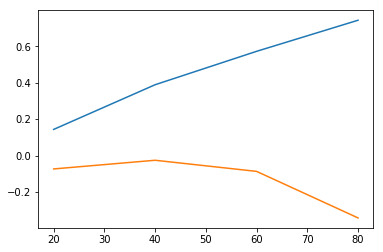

In [134]:
plt.plot(feature_list,rsq_list,feature_list,rsqadj_list)

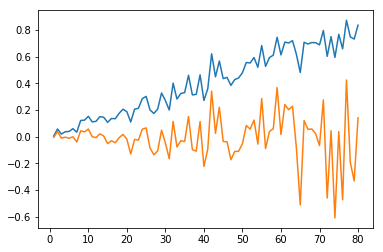

In [152]:
plt.plot(feature_list,rsq_list,feature_list,rsqadj_list)